# Set Up Enviornment

In [ ]:
!nvidia-smi

Sun Dec 24 03:17:19 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0              26W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import pandas as pd
import json
f = open('/content/4some.json')
df = json.load(f)

In [ ]:
df[:2]

[{'id': '9cb80237-070b-4d24-bfa5-203860ab5023',
  'instruction': '市長，你的努力大家都感受得到，也讓高雄成為一個新的亮點!大家都知道，相對的市長也成為媒體的焦點，這是過去所沒有的，尤其現在的曝光率，甚至超越了柯市長文哲，這是高雄的光榮。但是架設了這麼多媒體，造就了正能量和負能量，這些人都希望跟市長站在一起，當然這些人最重要的是要博取一些版面，市長也曾經說過，如何當一位好的市長?你選擇就是做牛做馬，不要坐享其成，這非常好。相對的在短短的四個多月裡面，創造了很好的佳績，無論經濟的投資、觀光產業，還有消費，都有非常好的成績。相對民進黨也開始緊張了，為什麼緊張?過去高雄市可以說，好像是童話故事裡面的睡美人，沉睡了二、三十年，忽然間有韓市長，你把她救醒了，把睡美人救醒了，高雄也救醒了，所以相對的他們都非常緊張。但是你為了救這位睡美人，市長也相對付出17年的苦行，這個大家都知道，所以針對如何應變這些負能量的人，他們也不會讓市長好過，絕對會用各種方式來阻礙你，讓你在任何一個行事上，產生非常大的阻礙。本席也要感謝市長，救了高雄，但是高雄未來如何發展?也需要很大的努力。市長及大家都知道，這段期間你承受非常多的委屈，為什麼承受這麼多的委屈?因為他們怕你把高雄市做得太好了，所以百般的阻礙你，相對這段期間你所受到的委屈，大家也都知道，與其要受到那麼多的委屈，本席想跟你一樣，不如去參選總統，這也許會更好。但是還有一個疑惑又產生出來了，你去參選總統的時候，本席看絕對會當選，但是當選了以後，高雄市怎麼辦?是不是因為你的當選，高雄又要回到睡美人一樣，要回去睡覺了?所以針對這個問題，請市長簡單回應一下，這也是所有市民朋友都非常關心的，請市長先回答，謝謝!謝謝市長。這個問題市民朋友都非常的疑惑，非常關心非常擔心，大家都知道，高雄過去也沉睡了二、三十年，在經濟面如同剛才市長講的，有這麼好的條件，過去都沒有在運用。忽然間市長你來了，才知道原來高雄有這麼好的條件，我們如何趕快往前衝?跟世界接軌，讓高雄成為未來發展中的城市，所以這個部分，市長我覺得你的理念非常對，也是大家共同來加油的。',
  'output': [0, 1, 0, 0]},
 {'id': '3dd107b8-f4c7-44ca-ac58-8f2fe98787ac',
  '

In [1]:
# Importing stock ml libraries
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import transformers
import torch
import json
import copy
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import (
    AutoConfig,
    AutoModelForSequenceClassification,
    AutoTokenizer,
    DataCollatorWithPadding,
    PretrainedConfig,
    SchedulerType,
    default_data_collator,
    get_scheduler,
    RobertaModel,
    LongformerModel,
    BertTokenizer,
    LongformerTokenizer,
    BertForSequenceClassification,
    LongformerForSequenceClassification,
    TransfoXLForSequenceClassification,
    TransfoXLTokenizer,
    RobertaForSequenceClassification,
    RobertaTokenizer,
)

import logging

logging.basicConfig(level=logging.ERROR)

## Access to Drive

In [2]:
from google.colab import drive
import os

# Setup work directory
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/ADL/Group Project')
os.listdir() # overview the files

Mounted at /content/drive


['Data',
 'requirement.txt',
 'run_classification.py',
 'Model',
 'Model_1',
 'train.json',
 'test.json',
 'validation.json',
 'test_answer.json',
 'Model_2',
 'Model_3',
 'PyTorch_model.bin']

In [ ]:
# Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [3]:
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float(len(set_true.union(set_pred)) )
        acc_list.append(tmp_a)
    return np.mean(acc_list)

# Overview Datasets

## Clean Data

In [4]:
df = pd.read_excel('Data/train_data.xlsx')

In [5]:
df['output'] = df[['information', 'justification', 'change', 'sanctions']].values.tolist()
df = df[['text', 'output']]
df = df.rename(columns={'text': 'instruction'})

In [6]:
import uuid

num_rows = len(df)
uuids = [str(uuid.uuid4()) for _ in range(num_rows)]

df.insert(0, 'id', uuids)

In [ ]:
df.head(2)

,id,instruction,output
0,bb0c813c-248c-49af-9a2b-a6e53786dfc0,但是有一件事情，本席感覺處理上還是非常的不妥，就是張顯耀違規施打疫苗事件。在這個事件裡面，雖...,"[0, 1, 0, 0]"
1,7f3aed1f-3482-4281-860f-77cc804b148d,好，謝謝市長。我相信假如今天疫苗夠的話，今天也不會產生這麼大的一個問題出來，也沒有類似這種案...,"[0, 0, 0, 0]"


In [7]:
df.shape

(12659, 3)

In [12]:
# 計算每個類別的比例
import matplotlib.pyplot as plt
import pandas as pd

def plot_category_distribution(df):
    category_counts = df['output'].apply(lambda x: pd.Series(x)).sum()
    print(f"Total Data: {len(df)}")

    category_labels = {0: 'Information', 1: 'Justification', 2: 'Change', 3: 'Sanction'}
    category_counts.index = [category_labels.get(x, x) for x in category_counts.index]
    category_ratios = category_counts / category_counts.sum()

    # Color
    morandi_colors = ['#b2a29d', '#857e7b', '#a6998a', '#7a6f66']
    colors = ['skyblue', 'salmon', 'limegreen', 'gold']


    plt.style.use('ggplot')
    category_ratios.plot(kind='bar', color=morandi_colors, fontsize=12)
    plt.title('Category Distribution', fontsize=14)
    plt.xlabel('Category', fontsize=10)
    plt.ylabel('Ratio', fontsize=10)

    y_max = category_ratios.max()
    plt.yticks(np.linspace(0, y_max, num=5))
    plt.xticks(rotation=15)
    plt.tight_layout()

    plt.show()

    return category_ratios


Total Data: 12659


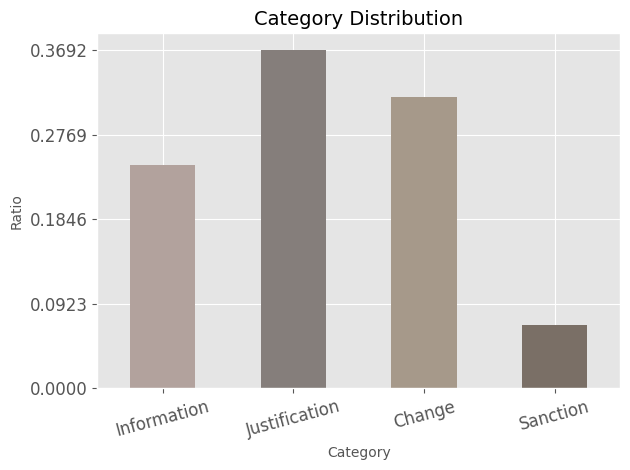

In [13]:
category_ratios = plot_category_distribution(df)

## Train Test Split

In [ ]:
# labels = ['要求資訊', '要求說明', '要求改變', '威脅制裁']

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
SEED = 42

train_val, test_answer = train_test_split(df, test_size=0.1, random_state=SEED)
train, val = train_test_split(train_val, test_size=0.11, random_state=SEED)  # 0.11 x 0.9 = 0.1
test = test_answer.drop(columns=['output'])

In [ ]:
train.to_json('train.json', orient='records', lines=True)
val.to_json('validation.json', orient='records', lines=True)
test.to_json('test.json', orient='records', lines=True)
test_answer.to_json('test_answer.json', orient='records', lines=True)

## Split by Ratio
This method is not workable

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
SEED = 42

# 轉換多標籤為單一標籤
def multilabel_to_singlelabel(row):
    # 將標籤列表轉換為字符串（例如：[1, 0, 0, 1] -> '1001'）
    return ''.join(map(str, row))

# 新列用於分層
df['stratify_col'] = df['output'].apply(multilabel_to_singlelabel)

train_val, test = train_test_split(df, test_size=0.1, stratify=df['stratify_col'], random_state=SEED)
train, val = train_test_split(train_val, test_size=0.11, stratify=train_val['stratify_col'], random_state=SEED)  # 0.11 x 0.9 = 0.99

def convert_to_int(lst):
    return [int(i) for i in lst]

train = train.drop(columns=['stratify_col'])
val = val.drop(columns=['stratify_col'])
test_answer = test.drop(columns=['stratify_col'])
test = test_answer.drop(columns=['output'])

train['output'] = train['output'].apply(convert_to_int)
val['output'] = val['output'].apply(convert_to_int)
test_answer['output'] = test_answer['output'].apply(convert_to_int)


Total Data: 3373


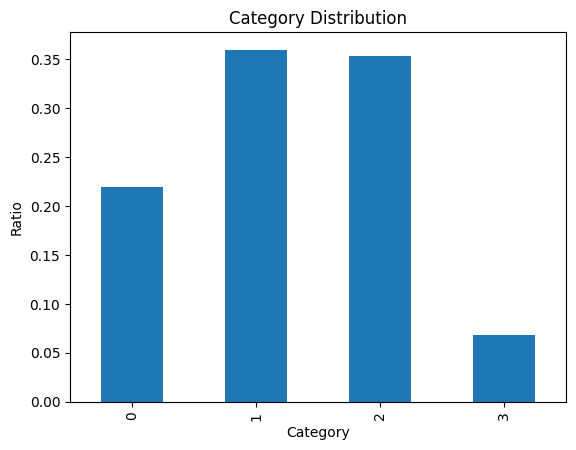

0    0.219070
1    0.359653
2    0.352876
3    0.068400
dtype: float64

In [ ]:
plot_category_distribution(train)

## Dataloader

In [ ]:
train_set = pd.read_json('train.json', orient='records', lines=True)
validation_set = pd.read_json('validation.json', orient='records', lines=True)
test_set = pd.read_json('test.json', orient='records', lines=True)

In [ ]:
import pandas as pd
import re

# Function
def remove_punctuation(text):
    punctuation = r'[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+'
    return re.sub(punctuation, ' ', text)

train_set['instruction'] = train_set['instruction'].apply(remove_punctuation)
validation_set['instruction'] = validation_set['instruction'].apply(remove_punctuation)
test_set['instruction'] = test_set['instruction'].apply(remove_punctuation)


In [ ]:
# Test only use the last 512 tokens
def truncate_texts(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: x[-512:] if isinstance(x, str) else x)
    return df

train_set = truncate_texts(train_set, 'instruction')
validation_set = truncate_texts(validation_set, 'instruction')
test_set = truncate_texts(test_set, 'instruction')

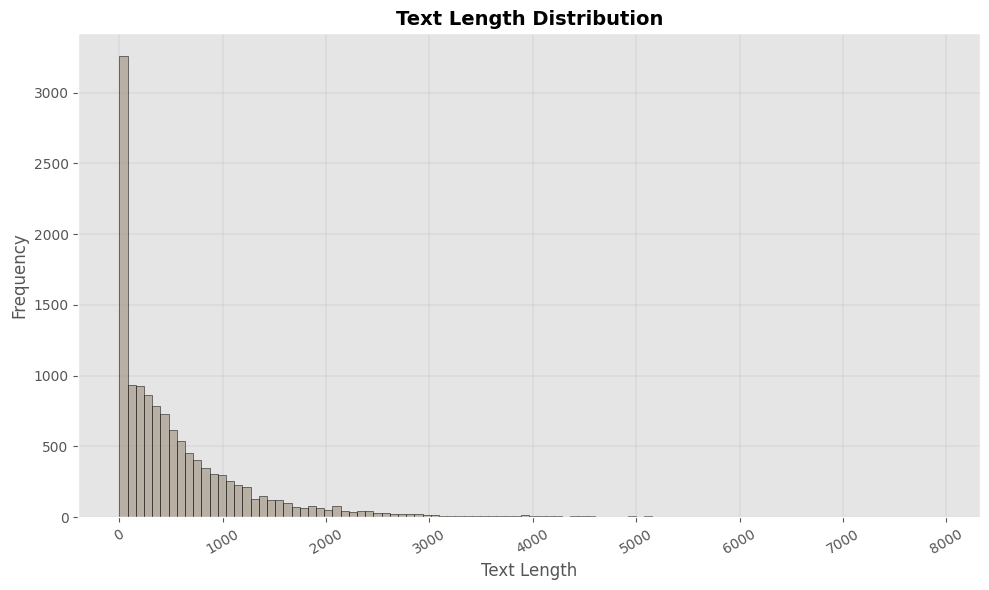

In [15]:
import matplotlib.pyplot as plt

text_lengths = df['instruction'].str.len()

plt.figure(figsize=(10, 6))
max_length = text_lengths.quantile(1)
plt.hist(text_lengths[text_lengths <= max_length], bins=100, color='#a6998a', alpha=0.7, edgecolor='black')

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.title('Text Length Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


## Hyperparameters

In [ ]:
# Set up hyperparameters

MAX_LEN = 512 # 512的倍數
NUM_LABELS = 4
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
TEST_BATCH_SIZE = 16
EPOCHS = 10
LEARNING_RATE = 2e-05
gradient_accumulation_steps = 4
OVERLAP = 64
MODEL_NAME_OR_PATH = "ValkyriaLenneth/longformer_zh"
MODEL_NAME_OR_PATH_XL = "transfo-xl-wt103"
MODEL_NAME_OR_PATH_RO = "hfl/chinese-roberta-wwm-ext"
TOKENIZER_PATH_BASE = "bert-base-chinese"

In [ ]:
class MultiLabelDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.instruction
        self.targets = self.data.output
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

## Longformer

In [ ]:
# config = AutoConfig.from_pretrained(MODEL_NAME_OR_PATH, num_labels=NUM_LABELS)
tokenizer = BertTokenizer.from_pretrained(TOKENIZER_PATH_BASE)
model = LongformerForSequenceClassification.from_pretrained(
    MODEL_NAME_OR_PATH,
    num_labels=NUM_LABELS,
    ignore_mismatched_sizes=True,
    problem_type='multi_label_classification',
)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/997 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/505M [00:00<?, ?B/s]

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at ValkyriaLenneth/longformer_zh and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# print("FULL Dataset: {}".format(df_combine.shape))
print("TRAIN Dataset: {}".format(train_set.shape))
print("VALID Dataset: {}".format(validation_set.shape))

training_set = MultiLabelDataset(train_set, tokenizer, MAX_LEN)
training_unit_set = MultiLabelDataset(train_set[:100], tokenizer, MAX_LEN)
validation_set = MultiLabelDataset(validation_set, tokenizer, MAX_LEN)

TRAIN Dataset: (10139, 3)
VALID Dataset: (1254, 3)


In [ ]:
print(training_set.text)

0        今天要進行總質詢 首先還是要感謝陳其邁市長 以及過去他率領的市府團隊 所有醫護同仁 甚至高雄...
1        青年局規劃每個月會有跟青年對談的活動 兩個月一次的青創之夜 這些青年要有更好的創意 我們也是...
2        上去；相對瑞北兒童公園整個樹 還有路都非常荒廢 大家偶爾才會維修 然後路也非常不完整 整個公...
3                           市長你可以直接下令2位副市長多久能完成這件事嗎?半年可以嗎?
4                        我們排除任何因素 你都不願意自行去接洽有可能可以取得疫苗的機會嗎?
                               ...                        
10134    等一下我再請教教育局 提到桃園青年局的跨局處業務 本席想分享一下桃園青年諮詢委員會的運作 為...
10135    他們吐槽我們的第二個重點 他用3年的統計 這個綠色部分是環保局交付的量 藍色部分是廠商自收的...
10136    蘇冺颱風造成南橫道路白布帆段道路沖毀 這個工程已經做2年了 為什麼延宕這麼久 不是私人土地 ...
10137    接下來還是一些交通問題 跟觀光也是有關聯 所以這部分也是期待交通局跟民政局可以來解決 就是有...
10138    民政局的資料也是落後你們好幾天 副局長 我把這個問題點出來 希望我們市府和市長這邊能夠多用一...
Name: instruction, Length: 10139, dtype: object


In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

valid_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': False,
                'num_workers': 0
                }
test_params = {'batch_size': TEST_BATCH_SIZE,
               'shuffle': False,
               'num_workers': 0,}

training_loader = DataLoader(training_set, **train_params)
training_unit_loader = DataLoader(training_unit_set, **train_params)
validation_loader = DataLoader(validation_set, **valid_params)
test_loader = DataLoader(test_set, **test_params)

# Model

In [ ]:
# Longformer
class LongformerClass(torch.nn.Module):
    def __init__(self, model_name_or_path):
        super(LongformerClass, self).__init__()
        self.l1 = LongformerModel.from_pretrained(model_name_or_path)
        self.pre_classifier = torch.nn.Linear(768, 768) # 更改到模型對應的hidden layer
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Linear(768, NUM_LABELS)

    def forward(self, input_ids, attention_mask):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.Tanh()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [ ]:
# model = LongformerClass(MODEL_NAME_OR_PATH)
model.to(device)


LongformerForSequenceClassification(
  (longformer): LongformerModel(
    (embeddings): LongformerEmbeddings(
      (word_embeddings): Embedding(21128, 768, padding_idx=0)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (position_embeddings): Embedding(4096, 768, padding_idx=0)
    )
    (encoder): LongformerEncoder(
      (layer): ModuleList(
        (0-11): 12 x LongformerLayer(
          (attention): LongformerAttention(
            (self): LongformerSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (query_global): Linear(in_features=768, out_features=768, bias=True)
              (key_global): Linear(in_features=768, out_features=768, bias=True)
          

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [ ]:
# Optimizer
optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)

# Train

In [ ]:
def validation(testing_loader):
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs.logits).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [ ]:
def train(epoch, gradient_accumulation_steps=gradient_accumulation_steps, train_batch_size=TRAIN_BATCH_SIZE):
    print(f"\n")
    print("*" * 10, "Start training Epoch", str(epoch + 1), "*" * 10)

    best_model = False
    best_model_dict = None
    model.train()
    optimizer.zero_grad()  # 初始化梯度
    total_loss = 0

    for step, data in tqdm(enumerate(training_loader, 0), total=round((train_set.shape[0] / train_batch_size))):
        ids = data['ids'].to(device, dtype=torch.long)
        mask = data['mask'].to(device, dtype=torch.long)
        targets = data['targets'].to(device, dtype=torch.float)

        outputs = model(ids, mask)
        logits = outputs.logits

        loss = loss_fn(logits, targets)
        total_loss += loss.item()
        loss.backward()

        # 每 gradient_accumulation_steps 步更新一次梯度
        if (step + 1) % gradient_accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

    avg_train_loss = total_loss / len(training_loader)
    print(f'Epoch {epoch + 1}: Average Training Loss: {avg_train_loss}')

    # Evaluate
    print(f"**********Validation**********")
    outputs, targets = validation(validation_loader)

    final_outputs = np.array(outputs) >= 0.5 # Should also considered training

    print(" " * 10,"Answer", " " * 15, "Prediction")
    for i in range(10):
        print(targets[i], final_outputs[i])

    # Calculate evaluation metrics
    accuracy = accuracy_score(targets, final_outputs)
    precision = precision_score(targets, final_outputs, average='micro')
    recall = recall_score(targets, final_outputs, average='micro')
    val_hamming_loss = metrics.hamming_loss(targets, final_outputs)
    val_hamming_score = hamming_score(np.array(targets), np.array(final_outputs))

    training_record['hamming_loss'].append(val_hamming_loss)
    training_record['hamming_score'].append(val_hamming_score)
    training_record['accuracy'].append(accuracy)
    training_record['precision'].append(precision)
    training_record['recall'].append(recall)

    # Print the evaluation metrics
    print(f"Hamming Score = {val_hamming_score}")
    print(f"Hamming Loss = {val_hamming_loss}")
    print(f'Epoch {epoch + 1}: Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}')
    print(f"\n")

    # 保存最佳模型
    if val_hamming_score > training_record['best_score']:
        best_model = True
        training_record['best_score'] = val_hamming_score

    if best_model:
        best_model = False
        print(f"***********Save this model!!!***********")
        best_model_dict = copy.deepcopy(model.state_dict())
        torch.save(best_model_dict, 'PyTorch_model.bin')

In [ ]:
import json
training_record = {'best_score': -float('inf'),
                   'hamming_loss': [],
                   'hamming_score': [],
                   'accuracy': [],
                   'precision': [],
                   'recall': []}

for epoch in range(EPOCHS):
    train(epoch)



********** Start training Epoch 1 **********


1268it [12:17,  1.72it/s]


Epoch 1: Average Training Loss: 0.43226055713364564
**********Validation**********


157it [00:26,  5.87it/s]


           Answer                 Prediction
[1.0, 1.0, 1.0, 1.0] [ True  True False False]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 0.0, 0.0] [ True  True False False]
[0.0, 1.0, 1.0, 0.0] [ True  True False  True]
[0.0, 1.0, 1.0, 0.0] [ True  True  True False]
[0.0, 0.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 0.0, 0.0] [False  True False False]
Hamming Score = 0.7369750132908028
Hamming Loss = 0.14812599681020733
Epoch 1: Accuracy: 0.5534, Precision: 0.7876, Recall: 0.8021


***********Save this model!!!***********


********** Start training Epoch 2 **********


1268it [12:16,  1.72it/s]


Epoch 2: Average Training Loss: 0.322501105799895
**********Validation**********


157it [00:26,  5.86it/s]


           Answer                 Prediction
[1.0, 1.0, 1.0, 1.0] [ True  True  True False]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 0.0, 0.0] [ True  True  True False]
[0.0, 1.0, 1.0, 0.0] [False  True  True  True]
[0.0, 1.0, 1.0, 0.0] [ True  True  True False]
[0.0, 0.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 0.0, 0.0] [False  True  True False]
Hamming Score = 0.7787745879851143
Hamming Loss = 0.12141148325358851
Epoch 2: Accuracy: 0.6188, Precision: 0.8323, Recall: 0.8272


***********Save this model!!!***********


********** Start training Epoch 3 **********


1268it [12:16,  1.72it/s]


Epoch 3: Average Training Loss: 0.2689212233398098
**********Validation**********


157it [00:26,  5.86it/s]


           Answer                 Prediction
[1.0, 1.0, 1.0, 1.0] [ True  True  True False]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 0.0, 0.0] [ True  True False False]
[0.0, 1.0, 1.0, 0.0] [False  True  True  True]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 0.0, 0.0] [False  True  True False]
Hamming Score = 0.8022993088782563
Hamming Loss = 0.10964912280701754
Epoch 3: Accuracy: 0.6555, Precision: 0.8395, Recall: 0.8573


***********Save this model!!!***********


********** Start training Epoch 4 **********


1268it [12:17,  1.72it/s]


Epoch 4: Average Training Loss: 0.22039837533114506
**********Validation**********


157it [00:26,  5.86it/s]


           Answer                 Prediction
[1.0, 1.0, 1.0, 1.0] [ True  True  True  True]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 0.0, 0.0] [ True False False False]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 0.0, 0.0] [False False False False]
Hamming Score = 0.8050903774587984
Hamming Loss = 0.10446570972886762
Epoch 4: Accuracy: 0.6699, Precision: 0.8641, Recall: 0.8400


***********Save this model!!!***********


********** Start training Epoch 5 **********


1268it [12:17,  1.72it/s]


Epoch 5: Average Training Loss: 0.18107044151822568
**********Validation**********


157it [00:26,  5.85it/s]


           Answer                 Prediction
[1.0, 1.0, 1.0, 1.0] [ True  True  True  True]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 0.0, 0.0] [ True  True  True False]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 0.0, 0.0] [False  True  True False]
Hamming Score = 0.8237639553429027
Hamming Loss = 0.09728867623604466
Epoch 5: Accuracy: 0.6986, Precision: 0.8481, Recall: 0.8868


***********Save this model!!!***********


********** Start training Epoch 6 **********


1268it [12:17,  1.72it/s]


Epoch 6: Average Training Loss: 0.1550350191970635
**********Validation**********


157it [00:26,  5.84it/s]


           Answer                 Prediction
[1.0, 1.0, 1.0, 1.0] [ True  True  True  True]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False  True  True False]
[1.0, 1.0, 0.0, 0.0] [ True False False False]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 0.0, 0.0] [False  True  True False]
Hamming Score = 0.8230994152046782
Hamming Loss = 0.0990829346092504
Epoch 6: Accuracy: 0.7065, Precision: 0.8538, Recall: 0.8724




********** Start training Epoch 7 **********


1268it [12:16,  1.72it/s]


Epoch 7: Average Training Loss: 0.12399584633571445
**********Validation**********


157it [00:26,  5.86it/s]


           Answer                 Prediction
[1.0, 1.0, 1.0, 1.0] [ True  True  True  True]
[1.0, 1.0, 1.0, 0.0] [ True  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 0.0, 0.0] [ True  True False False]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 0.0, 0.0] [False  True  True False]
Hamming Score = 0.8408426368952684
Hamming Loss = 0.0867224880382775
Epoch 7: Accuracy: 0.7400, Precision: 0.8683, Recall: 0.8930


***********Save this model!!!***********


********** Start training Epoch 8 **********


1268it [12:17,  1.72it/s]


Epoch 8: Average Training Loss: 0.10123821930983325
**********Validation**********


157it [00:26,  5.85it/s]


           Answer                 Prediction
[1.0, 1.0, 1.0, 1.0] [ True  True  True  True]
[1.0, 1.0, 1.0, 0.0] [ True  True  True False]
[0.0, 0.0, 1.0, 0.0] [False  True  True False]
[1.0, 1.0, 0.0, 0.0] [ True  True False False]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 0.0, 0.0] [False  True  True False]
Hamming Score = 0.8392477405635301
Hamming Loss = 0.08692185007974482
Epoch 8: Accuracy: 0.7392, Precision: 0.8647, Recall: 0.8974




********** Start training Epoch 9 **********


1268it [12:16,  1.72it/s]


Epoch 9: Average Training Loss: 0.08362137842321128
**********Validation**********


157it [00:26,  5.83it/s]


           Answer                 Prediction
[1.0, 1.0, 1.0, 1.0] [ True False  True  True]
[1.0, 1.0, 1.0, 0.0] [ True  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 0.0, 0.0] [ True False False False]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 0.0, 0.0] [False  True  True False]
Hamming Score = 0.8376528442317914
Hamming Loss = 0.08891547049441786
Epoch 9: Accuracy: 0.7376, Precision: 0.8544, Recall: 0.9058




********** Start training Epoch 10 **********


1268it [12:16,  1.72it/s]


Epoch 10: Average Training Loss: 0.07737151631234913
**********Validation**********


157it [00:26,  5.86it/s]

           Answer                 Prediction
[1.0, 1.0, 1.0, 1.0] [ True  True  True  True]
[1.0, 1.0, 1.0, 0.0] [ True  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 0.0, 0.0] [ True  True False False]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[0.0, 0.0, 1.0, 0.0] [False False  True False]
[1.0, 1.0, 1.0, 0.0] [False  True  True False]
[0.0, 1.0, 0.0, 0.0] [False  True  True False]
Hamming Score = 0.8405103668261563
Hamming Loss = 0.0863237639553429
Epoch 10: Accuracy: 0.7440, Precision: 0.8700, Recall: 0.8919




In [ ]:
filename = 'training_record_final_model_3.json'

with open(filename, 'w') as f:
    json.dump(training_record, f, indent=4)

# Validation

In [ ]:
outputs, targets = validation(validation_loader)

final_outputs = np.array(outputs) >= 0.5

157it [00:27,  5.81it/s]


In [ ]:
val_hamming_loss = metrics.hamming_loss(targets, final_outputs)
val_hamming_score = hamming_score(np.array(targets), np.array(final_outputs))

print(f"Hamming Score = {val_hamming_score}")
print(f"Hamming Loss = {val_hamming_loss}")

Hamming Score = 0.8405103668261563
Hamming Loss = 0.0863237639553429


In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(targets, final_outputs)
precision = precision_score(targets, final_outputs, average='micro')
recall = recall_score(targets, final_outputs, average='micro')

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.7440
Precision: 0.8700
Recall: 0.8919


# Predict

In [ ]:
MY_MODEL = "dean22029/Taiwan_Legislator_multilabel_classification"
tokenizer = BertTokenizer.from_pretrained(MY_MODEL)
model = LongformerForSequenceClassification.from_pretrained(
    MY_MODEL,
    num_labels=4,
    ignore_mismatched_sizes=True,
    problem_type='multi_label_classification',
)

config.json:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/505M [00:00<?, ?B/s]

In [ ]:
test_file = 'test.json'
reference_file = 'test_answer.json'

In [ ]:
def predict(test_file, tokenizer, model, device):
    test_df = pd.read_json(test_file, lines=True)
    test_df = truncate_texts(test_df, 'instruction')
    test_df['instruction'] = test_df['instruction'].apply(remove_punctuation)
    test_df['input_ids'] = test_df['instruction'].apply(lambda x: tokenizer.encode(x, truncation=True, max_length=512, add_special_tokens=True))

    predictions = []
    predictions_ = []
    model.to(device)
    model.eval()

    with torch.no_grad():
        for _, row in tqdm(test_df.iterrows(), total=test_df.shape[0]):
            input_ids = torch.tensor(row['input_ids']).unsqueeze(0).to(device)
            outputs = model(input_ids)
            logits = outputs.logits
            preds = torch.sigmoid(logits).cpu().numpy() >= 0.5
            preds_ = torch.sigmoid(logits).cpu().numpy() >= 0.6
            predictions.append(preds.astype(int).flatten().tolist())
            predictions_.append(preds_.astype(int).flatten().tolist())

    test_df['prediction'] = predictions
    test_df['prediction_0.6'] = predictions_
    test_df.drop(columns=['input_ids'], inplace=True)
    return test_df

In [ ]:
predictions = predict(test_file, tokenizer, model, device)

100%|██████████| 1266/1266 [01:10<00:00, 17.92it/s]


## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

def evaluate_predictions(answer_file, predict_file):
    answer_df = pd.read_json(answer_file, lines=True)

    answer_df = answer_df.sort_values(by='id').reset_index(drop=True)
    pred_df = predict_file.sort_values(by='id').reset_index(drop=True)

    y_true = np.array(answer_df['output'].tolist())
    y_pred = np.array(pred_df['prediction'].tolist())

    # Metrics
    val_hamming_score = hamming_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='micro')
    recall = recall_score(y_true, y_pred, average='micro')
    f1 = f1_score(y_true, y_pred, average='micro')

    print(f'Hamming Score: {val_hamming_score:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')


In [ ]:
evaluate_predictions(reference_file, predictions)

Hamming Score: 0.8238
Accuracy: 0.7125
Precision: 0.8635
Recall: 0.8757
F1 Score: 0.8695


In [ ]:
def calculate_class_wise_metrics(answer_file, pred_file):

    answer_df = pd.read_json(answer_file, lines=True)
    answer_df = answer_df.sort_values(by='id').reset_index(drop=True)
    pred_df = pred_file.sort_values(by='id').reset_index(drop=True)

    y_true = np.array(answer_df['output'].tolist())
    y_pred = np.array(pred_df['prediction'].tolist())

    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }

    for i in range(y_true.shape[1]):
        accuracy = accuracy_score(y_true[:, i], y_pred[:, i])
        precision = precision_score(y_true[:, i], y_pred[:, i], zero_division=0)
        recall = recall_score(y_true[:, i], y_pred[:, i], zero_division=0)
        f1 = f1_score(y_true[:, i], y_pred[:, i], zero_division=0)

        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1_score'].append(f1)

    return metrics


In [ ]:
class_wise_metrics = calculate_class_wise_metrics(reference_file, predictions)

print("Label Metrics:")
for metric, values in class_wise_metrics.items():
    print(f"{metric}: {values}")


Label Metrics:
accuracy: [0.8894154818325435, 0.8886255924170616, 0.891785150078989, 0.9478672985781991]
precision: [0.8523489932885906, 0.8764044943820225, 0.8646003262642741, 0.8125]
recall: [0.8373626373626374, 0.9217134416543574, 0.9075342465753424, 0.6190476190476191]
f1_score: [0.8447893569844789, 0.8984881209503239, 0.885547201336675, 0.7027027027027026]


## visualization

In [ ]:
import json
import matplotlib.pyplot as plt

def plot_training_record(json_files, key):
    plt.figure(figsize=(12, 7))

    colors = ['#708090', '#556b2f', '#2f4f4f', '#bc8f8f', '#b2a29d', '#857e7b', '#a6998a', '#7a6f66']
    labels = ['Max Length 1024',
              'Max 1024, bert-base-chinese',
              'Max Length 512',
              'Max Length 512, BT',
              'Max Length 512, BT + No Punc',
              'Max Length 512, batch size 8 + BT + No Punc']

    for i, file_path in enumerate(json_files):
        with open(file_path, 'r') as file:
            data = json.load(file)

            if key in data:
                values = data[key]
                if isinstance(values, list):
                    plt.plot(values, label=labels[i], color=colors[i % len(colors)])
                else:
                    print(f"Key '{key}' in file {file_path} is not a list.")
            else:
                print(f"Key '{key}' not found in file {file_path}.")

    title = ' '.join(key.split('_')).title()
    plt.title(f'{title}', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel(f'{title}', fontsize=14)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

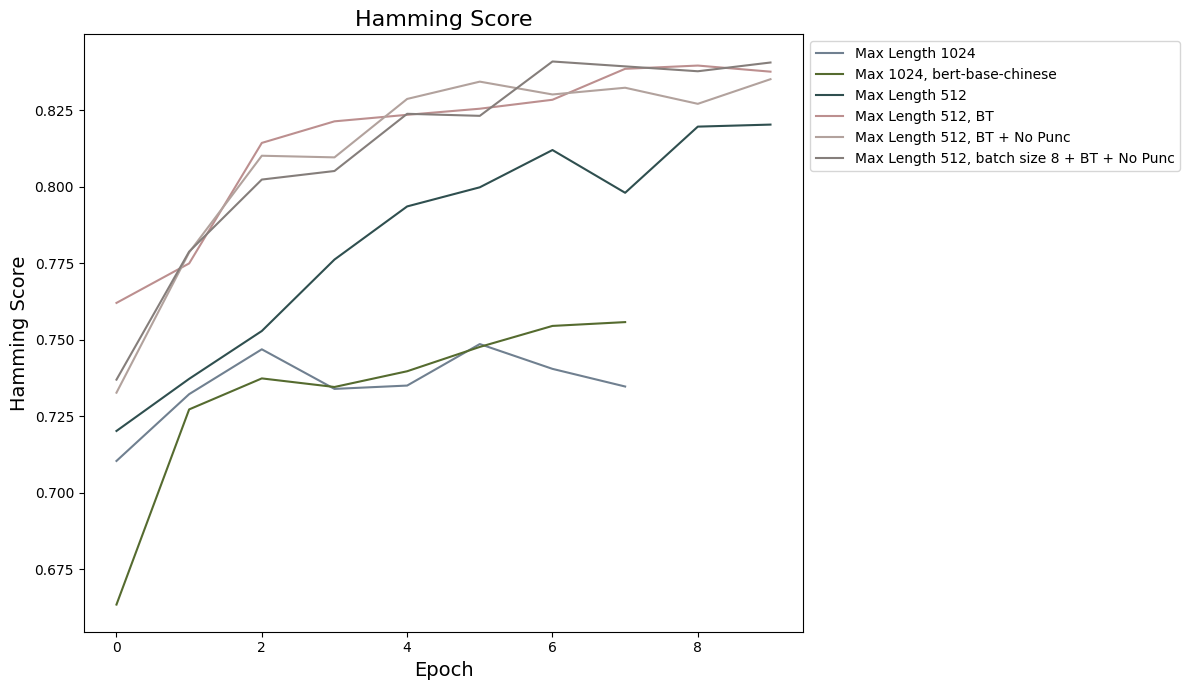

In [ ]:
training_record = ['Data/training_record.json',
                   'Data/training_record_base.json',
                   'Data/training_record_final_model.json',
                   'Data/training_record_final_backward_model.json',
                   'Data/training_record_final_model_2.json',
                   'Data/training_record_final_model_3.json']
plot_training_record(training_record, 'hamming_score')

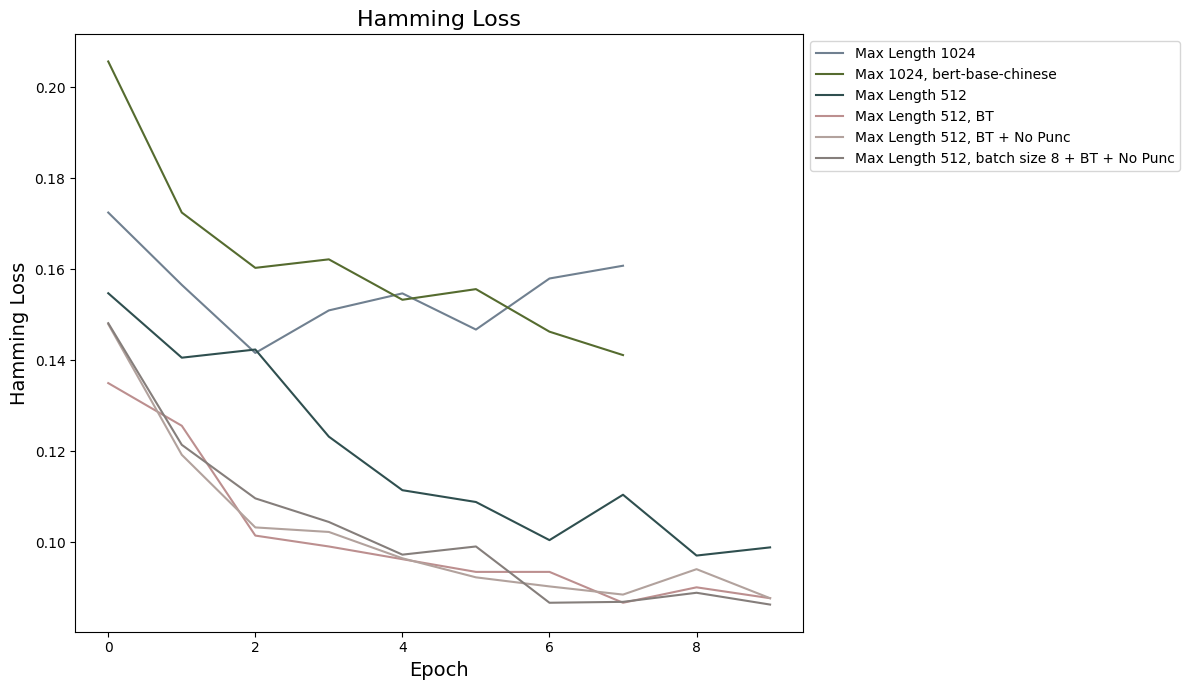

In [ ]:
plot_training_record(training_record, 'hamming_loss')

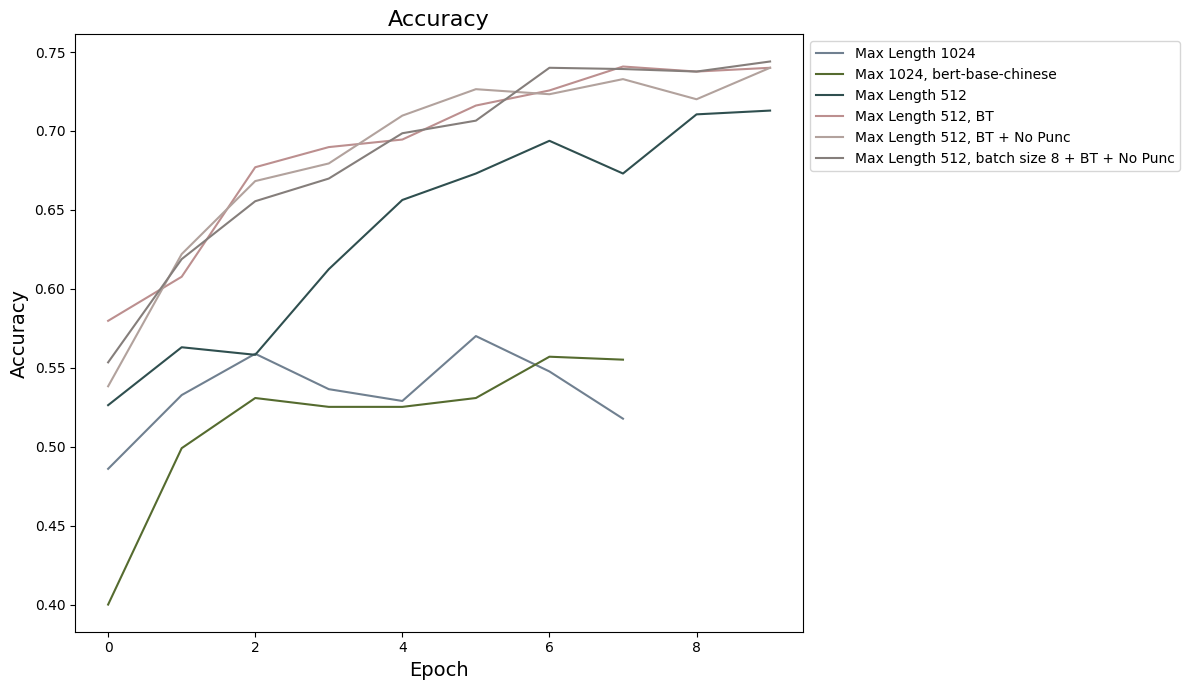

In [ ]:
plot_training_record(training_record, 'accuracy')

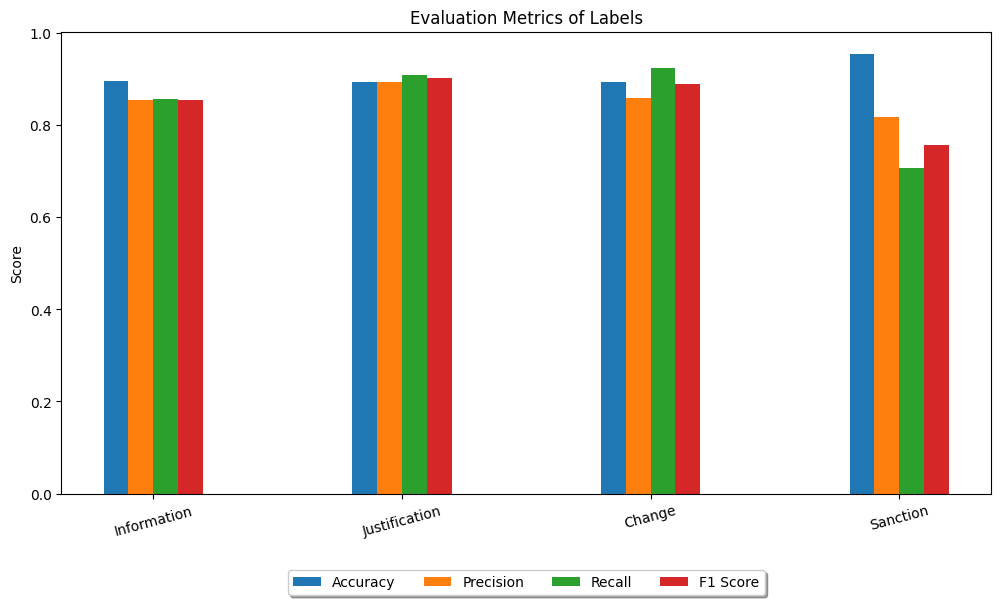

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

accuracy = [0.8957, 0.8934, 0.8942, 0.9550]
precision = [0.8534, 0.8939, 0.8583, 0.8165]
recall = [0.8571, 0.9084, 0.9229, 0.7063]
f1_score = [0.8553, 0.9011, 0.8894, 0.7574]

labels = ['Information', 'Justification', 'Change', 'Sanction']
x = np.arange(len(labels))
width = 0.1

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy', color='#1f77b4')
rects2 = ax.bar(x - width/2, precision, width, label='Precision', color='#ff7f0e')
rects3 = ax.bar(x + width/2, recall, width, label='Recall', color='#2ca02c')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1 Score', color='#d62728')


ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics of Labels')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=4)

plt.show()


# Save Model

In [ ]:
output_dir = "./Model_3"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

('./Model_3/tokenizer_config.json',
 './Model_3/special_tokens_map.json',
 './Model_3/vocab.txt',
 './Model_3/added_tokens.json')

# Demo

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
from transformers import pipeline
import pandas as pd
import time

markdown_content = """
## Legislator Interpellation Classifier
This is a classifier for legislator dialogues. Please enter the dialogue text in the input box below, and the model will predict its label.
Features:
- Trained using the transcript records of Taiwanese city councilors.
- Multi-label task.
- 4 types of Labels including: 要求資訊、要求說明、要求改變、威脅制裁.
We used the following model [dean22029/Taiwan_Legislator_multilabel_classification](https://huggingface.co/dean22029/Taiwan_Legislator_multilabel_classification)
"""



model = pipeline("text-classification", model="dean22029/Taiwan_Legislator_multilabel_classification", top_k=None)
label_mapping = {'LABEL_0': '要求資訊', 'LABEL_1': '要求說明', 'LABEL_2': '要求改變', 'LABEL_3': '威脅制裁'}

def predict_label(text, progress=gr.Progress(), max_len=512):
    # Take the last 512 tokens
    truncated_text = text[-max_len:]
    progress(0, desc="開始處理")
    time.sleep(1)
    progress(0.3, desc=f"正在分析文本")
    predictions = model(truncated_text)

    # Prediction
    labels = [label_mapping.get(prediction['label']) for prediction in predictions[0] if prediction['score'] > 0.5]
    label_scores = {label_mapping.get(prediction['label']): prediction['score'] for prediction in predictions[0]}

    # Output Dataframe
    df = pd.DataFrame(label_scores.items(), columns=['Label', 'Probability'])

    return ", ".join(labels) if labels else "無相關標籤", df

interface = gr.Interface(
    fn=predict_label,
    inputs=gr.Textbox(lines=2, placeholder="輸入您想分析的文字..."),
    outputs=["label", "dataframe"],
    theme="Default",
    title="Legislator interpellation Classification",
    description=markdown_content,
    allow_flagging="never",
    examples=[["接下來想針對大巨蛋問題詢問一下目前進度，是這樣子的，之前你們都在說大巨蛋會蓋好，所以到底什麼時候會蓋好呢？怎麼拖這麼久？"],
              ["你不用跟本席講這個風涼話！什麼優點？營運績效？市長，臺北農產運銷公司抽取固定的營業額比例，另外還有每年1億2,000萬元的停車場業外收入，這樣的工作是「孤行獨市」（臺語），臺北農產運銷公司是「孤行獨市」，張三、李四、王二麻子來做，也都會賺錢啦！你懂嗎？結果你找個流氓來做！"],
              ["韓國瑜，本席直接問你，站在你旁邊的市長，是不是就是你說的「男人世界裡面的『豎仔』（臺語）」！沒有擔當！"],
              ["柯市長我..我告訴你，我告訴你，我們選民選你是當市長不是選你當皇帝，你現在 藉由這樣網路，你操控的網軍操作，對於監督你的、批評你的，極盡網路霸凌之能事，柯市長，你的網軍現在是齁，順柯者生啦，逆柯者亡，這樣的行為、做法，跟納粹時期啊那個黑衫軍一樣的!柯市長，過去台灣的民主運動你沒有參與我不怪你，可是，你用這種新型態的網路霸凌、操控網軍來挑起世代對立，來傷害我們台灣的民主體制，這一點，我沒辦法原諒你，我瞧不起你!"],
              ["你不用...哩母面墊底遐台上沒幾分鐘哩咧五四三，證據擺的很清楚，旁邊這位我不 想看到你(大熊)，你下去，誰叫你上來的。 證據是甚麼?你把790萬的市府預算，你拿去做你的網路宣傳影片，所有的網紅，蘋果C打 啦黑素斯啦上班不要看啦啾啾鞋啦甚麼阿滴英文，所有，哦，最近你還要做的台客劇場、 呱吉、蔡阿嘎等等我想你一定心裡有數嘛，你怎麼會不曉得呢?這些，如果你是拿你去抵押的房產，欸，你拿來做，那你說這個是個人，你的政治宣傳，那我們沒話講，你公然堂而皇之的拿公帑來拍攝網路影片，宣揚你自己，而且裡面談的，其實跟市政風馬牛不相干，在我看哪，柯市長我不客氣的講，你就是沒本事才會搞這種東西"],
              ["局長，我瞭解了。之後如果還有什麼細節要報告，可以到我的辦公室來。今天這段總質詢的時間，通常我不喜歡問個案的問題，但是今天這個個案，如果沒有被妥善處理的話，也會變成臺北市教育局系統性的問題，會讓臺北市的家長開始不信任臺北市教育局針對這種不當體罰案件的處理，而且實質上這些家長跟我抱怨，但這個抱怨目前我也還沒證實，就是他們說後來有在教育局的貼文上表達他們的不滿和抗議，但是卻被隱蔽了他們的發言內容。"],
              ["接著這個議題也跟空污有關係，在林園石化工業區旁邊有中芸國小，中芸國小有架設，這應該是環保署所架設的FTIR光譜分析檢測儀，要檢測空污排放的數據，這些的檢測都超過周界的標準，都是有毒的化學物質。這一點當初在雲林縣麥寮有一間許厝國小，那一間就是由台塑全部來幫學童做一個健康風險評估，結果才發現小朋友血液中的濃度有一些都超標，所以不得不把那所學校（許厝分校）遷移，所以在林園、大發工業區國小的學童應該也要來做這一些健康風險評估的檢查，這樣比較了解啊!因為在整個林園、大寮地區目前健康風險評估、流行病學的一個研究，目前還沒有做。大林蒲六個里都有做，所以才啟動遷村，為什麼啟動遷村?就是因為經過健康風險評估、流行病學調查，發現大林蒲那個地方的危害物質真的太高，所以一定要遷村。這一份是由我們國衛院副研究員陳裕政所調查出來的，他說大林蒲地區的環境監測結果與國衛院對其他地區正進行調查的地區相比較，大林蒲地區的危害物質濃度低於林園工業區，比雲林六輕高，這一點我請問衛生局長，國衛院提出的這一份，市政府衛生局知道嗎?局長，請答復。這個意思就表示，林園工業區危害物質的濃度比大林蒲還高，那麼大林蒲要遷村，現在這個問題就變成林園怎麼辦?局長，那是一般的健康檢查，本席所說的是做流行病學研究和健康風險評估，這個要比較專業，而且也比較針對一些有害的化學物質的化學成分來做研究。所以這個不管由市政府來啟動，看是要用我們的空污基金，或者是要由當地的石化工業區、或者是工業局、或者是市政府的財源，既然國衛院已經提出大林蒲地區的危害物質濃度低於林園工業區，那麼林園就變成全高雄市危害物質濃度最高的地區，比大林蒲還高，所以這個議題不能就這樣打住，不是只有大林蒲遷村，遷村以後，那林園怎麼辦?大林蒲地區所有的不管是那些重工業、重污染有沒有改善?會不會飄散到林園?不是只有把大林蒲這六個里遷走，然後眼不見為淨，那麼那裡的污染要怎麼辦?污染要跑去哪裡?現在只剩下林園，再來就由林園接收，林園那些百姓的生命真是在旦夕之間，真的是很危險。所以我們一定嚴格要求，市政府要啟動林園地區的健康風險評估、流行病學調查。這一點請市長答復一下，市長，請答復。韓市長，剛剛提到的是針對國小學童，但本席認為我們有幾個村落跟工業區是鄰近的、一牆之隔的，那些村落大概有8個里，那8個里也要一併來做調查，不是只有國小，而要包括8個里，24個里裡面有8個里跟工業區是一牆之隔的。"]]
)

interface.launch(debug=True, share=True, show_error=True)


config.json:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/505M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://de5e09e0d3f1b52a30.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://de5e09e0d3f1b52a30.gradio.live
